# EdStats Data Analysis

## OBJECTIVE:
- Which countries have a strong potential of customers for our services?
- For each of these countries, how will this customer potential evolve?
- In which countries should the company operate as a priority?

__Importing liberaries__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import os
%matplotlib inline

### Reading Data

In [2]:
data = pd.read_csv('EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape # data dimension

(886930, 70)

In [4]:
data_GDP= pd.read_csv('C:/Users/azade/Desktop/OC/Projet 2/GDPpCAP.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 66


__Checking indicarotr__

In [ ]:
data.groupby('Indicator Name').count()

We have 3665 indicators.

### Reading country data

In [11]:
data_country= pd.read_csv('EdStatsCountry.csv')
data_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [12]:
data_country.shape

(241, 32)

In [13]:
data_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

__Create a DF with contry_code, name, region and income_group__


In [14]:
countries_income = pd.DataFrame({"Country Code" : data_country["Country Code"].unique(), 
                                 "Name" : data_country["Short Name"], 
                                 "Region" : data_country["Region"], 
                                 "Income_group" : data_country["Income Group"]})

countries_income

,Country Code,Name,Region,Income_group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
236,XKX,Kosovo,Europe & Central Asia,Lower middle income
237,YEM,Yemen,Middle East & North Africa,Lower middle income
238,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
239,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


__Adding 2 data frames (data plus countries_income)__

In [15]:
data_p_country = pd.merge(data,countries_income, left_on='Country Code', right_on='Country Code')
data_p_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2075,2080,2085,2090,2095,2100,Unnamed: 69,Name,Region,Income_group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN


__Select interesting years from data_p_country__

In [16]:
data_p_country.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', 'Name', 'Region', 'Income_group'],
      dtype='object')

__Keeping the years from 2025 to 2100 for projection__

In [17]:
data_projection = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                        'Indicator Name', 'Indicator Code','2025', '2030', '2035', '2040', '2045',
                                        '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                                        '2095', '2100'])
data_projection.shape

(883265, 22)

__Keeping the years from 2000 to 2020 for analysing data__

In [18]:
data_p_country_reduced = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                                      'Indicator Name', 'Indicator Code','2000', '2001', 
                                                       '2002', '2003', '2004', '2005','2006',
                                                       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                                       '2015','2016', '2017','2020'])
data_p_country_reduced.shape

(883265, 25)

__Remove data with no value in Income_group__

In [19]:
data_p_country_reduced = data_p_country_reduced[data_p_country_reduced.Income_group.notnull()]
data_p_country_reduced.shape

(784310, 25)

Select Countries with __Upper middle income__ and __High income__

In [20]:
data_p_country_reduced.Income_group.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [21]:
incomes_to_keep = ['Upper middle income', 'High income: nonOECD', 'High income: OECD']
data_r_income = data_p_country_reduced[data_p_country_reduced.Income_group.isin(incomes_to_keep)]
data_r_income.shape

(476450, 25)

__Missing values__

<AxesSubplot:>

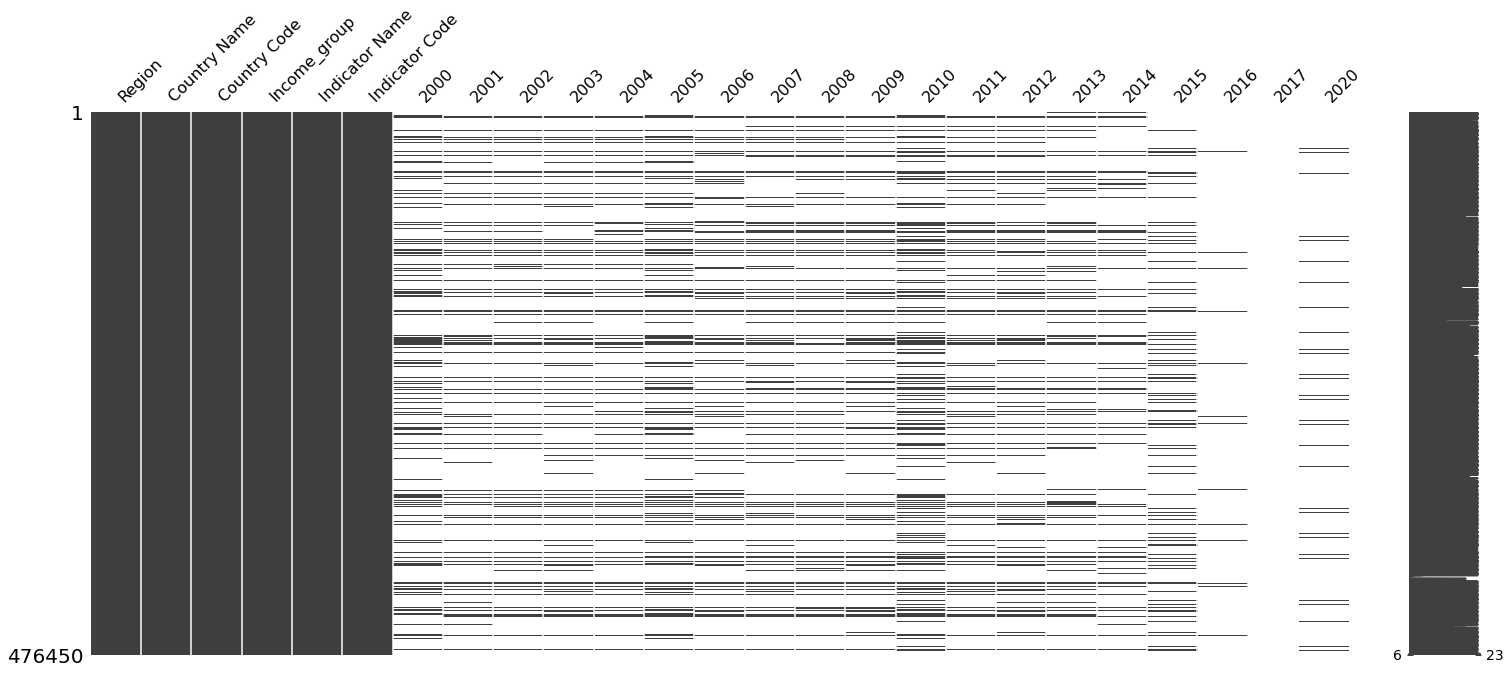

In [22]:
import missingno as msno
msno.matrix(data_r_income)

Not so much values after 2015

Interesting to keep '2000', '2005','2010','2015'

__Droping years "2016","2017","2020"__

In [23]:
data_r_income= data_r_income.drop(columns=['2016','2017','2020'])

### Selecte useful Indicators from "Indicator Code" feature

- Internet
- Education
- Population
- Economy

### INTERNET

- Internet users (per 100 people)(IT.NET.USER.P2)
- Personal computers (per 100 people)(IT.CMP.PCMP.P2)



In [24]:
data_r_internet = data_r_income.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")|
                                                (data_r_income['Indicator Code'] == "IT.CMP.PCMP.P2")] 
data_r_internet.shape

(260, 22)

In [25]:
data_r_internet.groupby('Indicator Name').count()

,Region,Country Name,Country Code,Income_group,Indicator Code,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Internet users (per 100 people),130,130,130,130,130,117,115,117,114,117,...,120,121,121,120,120,121,119,120,120,120
Personal computers (per 100 people),130,130,130,130,130,95,107,107,104,103,...,65,31,18,1,0,0,0,0,0,0


We almost have no data for PC, so we remove it.

__Just looking for the countries with Internet access__

In [26]:
data_r_internet = data_r_internet.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")] 
data_r_internet= data_r_internet.rename({"Country Code": "Country Code","Internet_PC": "Internet" },axis=1)

data_r_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,...,9.609991,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,...,7.375985,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,...,48.936847,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.910000
111325,Sub-Saharan Africa,Angola,AGO,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.105046,0.136014,0.270377,0.370682,...,1.500000,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,10.2,12.400000


In [27]:
data_r_internet.shape

(130, 22)

### Population

- Population, total(SP.POP.TOTL)
- Population, ages 15-24, total(SP.POP.1524.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)
- Population, ages 15-64, total(SP.POP.1564.TO)

In [28]:
codes_to_keep = ['SP.POP.TOTL', 
                 'SP.POP.1524.TO.UN',
                 'SP.POP.1564.TO',
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]


In [29]:
data_r_pop.shape

(520, 22)

In [30]:
data_r_pop.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,,
SP.POP.1524.TO.UN,130,130,130,130,130,108,109,110,110,109,...,105,100,100,100,100,100,100,100,100,100
SP.POP.1564.TO,130,130,130,130,130,111,111,111,111,111,...,111,111,111,111,111,111,111,111,110,110
SP.POP.TOTL,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,127,127
SP.TER.TOTL.IN,130,130,130,130,130,109,110,110,110,110,...,109,109,109,110,107,101,98,95,110,84


In [31]:
codes_to_keep = ['SP.POP.1564.TO',
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Education

- Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- Enrolment in tertiary education, all programmes, both sexes (number)(SE.TER.ENRL)

In [32]:
codes_to_keep = ['BAR.TER.CMPT.15UP.ZS', 
                 'SE.TER.ENRL']
data_r_edu = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

In [33]:
data_r_edu.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.TER.CMPT.15UP.ZS,130,130,130,130,130,86,0,0,0,0,...,0,0,0,0,86,0,0,0,0,0
SE.TER.ENRL,130,130,130,130,130,76,77,83,86,81,...,81,80,85,80,83,82,87,85,81,74


In [34]:
pivot_edu = data_r_edu.pivot_table(index=['Country Name'] ,columns=['Indicator Code'],values='2010')          
                            
pivot_edu.head()

Indicator Code,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL
Country Name,,
Albania,0.93,122326.0
Algeria,6.66,1144271.0
Antigua and Barbuda,NaN,1170.0
Argentina,2.87,2520985.0
Aruba,NaN,2330.0


In [35]:
pivot_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, Albania to Venezuela, RB
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BAR.TER.CMPT.15UP.ZS  86 non-null     float64
 1   SE.TER.ENRL           83 non-null     float64
dtypes: float64(2)
memory usage: 2.4+ KB


### Expenditures on education

- GDP(gross domestic product) per capita based on purchasing power parity (PPP). (current international dollar)(NY.GDP.PCAP.PP.CD)
- GNI(gross national income) per capita based on purchasing power parity (PPP).GNI per capita, PPP (current international dollar)(NY.GNP.PCAP.PP.CD)

- Government expenditure on education as % of GDP (%)(SE.XPD.TOTL.GD.ZS)
- Expenditure on education as % of total government expenditure (%)(SE.XPD.TOTL.GB.ZS)


In [36]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD',
                'SE.XPD.TOTL.GB.ZS',
                'NY.GNP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

In [37]:
data_r_exp.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,,
NY.GDP.PCAP.PP.CD,130,130,130,130,130,109,110,110,110,110,...,110,110,110,110,110,112,109,109,107,106
NY.GNP.PCAP.PP.CD,130,130,130,130,130,103,106,107,107,108,...,108,109,109,109,109,109,108,108,106,105
SE.XPD.TOTL.GB.ZS,130,130,130,130,130,67,70,78,71,73,...,67,69,68,71,71,68,63,67,52,19
SE.XPD.TOTL.GD.ZS,130,130,130,130,130,72,73,81,74,77,...,71,73,72,74,73,70,64,69,53,22


In [38]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Demographics

__Internet__

- Internet users (per 100 people)(IT.NET.USER.P2)

__Population__

- Population, ages 15-64, total(SP.POP.1564.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)

__Education__

- Barro-Lee: Percentage of population age 15+ with tertiary schooling in 2010. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- Enrolment in tertiary education, all programmes, both sexes in 2010 (number)(SE.TER.ENRL)

__Expenditures on education__
- Government expenditure on education as % of GDP (%)(SE.XPD.TOTL.GD.ZS)
- GDP per capita, PPP (current international dollar)(NY.GDP.PCAP.PP.CD)

__Looking for all the countries which have " Upper middle income and High income" and our selected indicators.__

In [39]:
data_r_income.shape

(476450, 22)

In [40]:
indicators_to_keep = ['IT.NET.USER.P2',
                      
                      'SP.POP.1564.TO', 
                       'SP.TER.TOTL.IN',
                      
                      'BAR.TER.CMPT.15UP.ZS',
                      'SE.TER.ENRL',
                       
                      'NY.GDP.PCAP.PP.CD', 
                      'SE.XPD.TOTL.GB.ZS']
data_keep = data_r_income[data_r_income['Indicator Code'].isin(indicators_to_keep)]
data_keep.shape

(910, 22)

In [41]:
data_keep['Indicator Code'].unique()

array(['BAR.TER.CMPT.15UP.ZS', 'SE.TER.ENRL', 'SE.XPD.TOTL.GB.ZS',
       'NY.GDP.PCAP.PP.CD', 'IT.NET.USER.P2', 'SP.TER.TOTL.IN',
       'SP.POP.1564.TO'], dtype=object)

<AxesSubplot:>

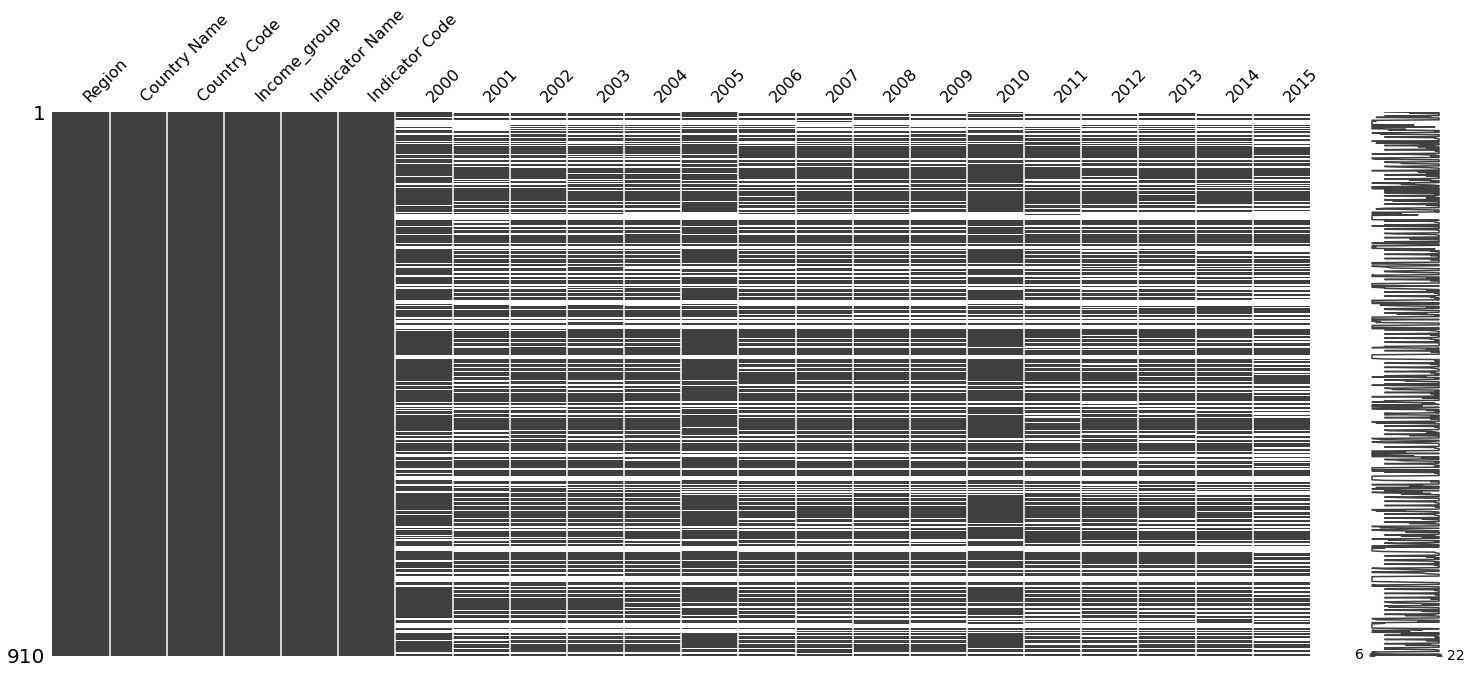

In [42]:
msno.matrix(data_keep)

In [43]:
pivot_edu.head()

Indicator Code,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL
Country Name,,
Albania,0.93,122326.0
Algeria,6.66,1144271.0
Antigua and Barbuda,NaN,1170.0
Argentina,2.87,2520985.0
Aruba,NaN,2330.0


In [44]:
data_keep_2015 = data_keep.pivot_table(index=['Country Name'],columns=['Indicator Code'], 
                                                  values= '2015')
data_keep_2015.head()

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
Country Name,,,,,,
Albania,63.252933,11449.094589,160527.0,NaN,2000257.0,276247.0
Algeria,38.200000,14643.343064,1289474.0,NaN,26106760.0,3492401.0
Andorra,96.910000,NaN,501.0,NaN,NaN,NaN
Angola,12.400000,6648.124016,221037.0,NaN,14100537.0,2374694.0
Antigua and Barbuda,70.000000,21503.952551,NaN,NaN,68805.0,7935.0


In [45]:

result = pd.merge(pivot_edu, data_keep_2015, left_on='Country Name',right_on='Country Name', how="outer")
result

Indicator Code,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL_x,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL_y,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
Country Name,,,,,,,,
Albania,0.93,122326.0,63.252933,11449.094589,160527.0,NaN,2000257.0,276247.0
Algeria,6.66,1144271.0,38.200000,14643.343064,1289474.0,NaN,26106760.0,3492401.0
Antigua and Barbuda,NaN,1170.0,70.000000,21503.952551,NaN,NaN,68805.0,7935.0
Argentina,2.87,2520985.0,68.043064,20379.779854,NaN,NaN,27734296.0,3450626.0
Aruba,NaN,2330.0,88.661227,NaN,1166.0,NaN,72162.0,7634.0
...,...,...,...,...,...,...,...,...
St. Vincent and the Grenadines,NaN,NaN,51.770000,11146.799310,NaN,NaN,74585.0,9872.0
Suriname,NaN,NaN,42.763828,15755.166272,NaN,NaN,367212.0,42976.0
Turkmenistan,NaN,NaN,14.996775,15995.784934,NaN,NaN,3644217.0,NaN


For indicator 'BAR.TER.CMPT.15UP.ZS' keeping data from 2010.

In [46]:
result.shape

(125, 8)

In [47]:
countries_income.head()

,Country Code,Name,Region,Income_group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD


In [48]:
countries_income.shape

(241, 4)

In [49]:
final_df= pd.merge(countries_income,result, left_on='Name',right_on='Country Name',how="right")
final_df.shape

(125, 12)

In [50]:
final_df.head()

,Country Code,Name,Region,Income_group,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL_x,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SE.TER.ENRL_y,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
0,ALB,Albania,Europe & Central Asia,Upper middle income,0.93,122326.0,63.252933,11449.094589,160527.0,NaN,2000257.0,276247.0
1,DZA,Algeria,Middle East & North Africa,Upper middle income,6.66,1144271.0,38.200000,14643.343064,1289474.0,NaN,26106760.0,3492401.0
2,ATG,Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,NaN,1170.0,70.000000,21503.952551,NaN,NaN,68805.0,7935.0
3,ARG,Argentina,Latin America & Caribbean,Upper middle income,2.87,2520985.0,68.043064,20379.779854,NaN,NaN,27734296.0,3450626.0
4,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,2330.0,88.661227,NaN,1166.0,NaN,72162.0,7634.0


In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          116 non-null    object 
 1   Name                  116 non-null    object 
 2   Region                116 non-null    object 
 3   Income_group          116 non-null    object 
 4   BAR.TER.CMPT.15UP.ZS  86 non-null     float64
 5   SE.TER.ENRL_x         83 non-null     float64
 6   IT.NET.USER.P2        120 non-null    float64
 7   NY.GDP.PCAP.PP.CD     106 non-null    float64
 8   SE.TER.ENRL_y         74 non-null     float64
 9   SE.XPD.TOTL.GB.ZS     19 non-null     float64
 10  SP.POP.1564.TO        110 non-null    float64
 11  SP.TER.TOTL.IN        84 non-null     float64
dtypes: float64(8), object(4)
memory usage: 12.7+ KB


In [52]:
features_with_na=[features for features in final_df.columns if final_df[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(final_df[feature].isnull().mean(),2),  ' % missing values')
 

Country Code 0.07  % missing values
Name 0.07  % missing values
Region 0.07  % missing values
Income_group 0.07  % missing values
BAR.TER.CMPT.15UP.ZS 0.31  % missing values
SE.TER.ENRL_x 0.34  % missing values
IT.NET.USER.P2 0.04  % missing values
NY.GDP.PCAP.PP.CD 0.15  % missing values
SE.TER.ENRL_y 0.41  % missing values
SE.XPD.TOTL.GB.ZS 0.85  % missing values
SP.POP.1564.TO 0.12  % missing values
SP.TER.TOTL.IN 0.33  % missing values


__Droping the indicatores which more than 50% indicatores__

In [53]:
final_df = final_df.drop(['SE.XPD.TOTL.GB.ZS'], axis=1)

In [54]:
final_df = final_df.drop(['SE.TER.ENRL_y'], axis=1)

In [55]:
final_df = final_df[final_df.Name.notnull()]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          116 non-null    object 
 1   Name                  116 non-null    object 
 2   Region                116 non-null    object 
 3   Income_group          116 non-null    object 
 4   BAR.TER.CMPT.15UP.ZS  81 non-null     float64
 5   SE.TER.ENRL_x         79 non-null     float64
 6   IT.NET.USER.P2        111 non-null    float64
 7   NY.GDP.PCAP.PP.CD     100 non-null    float64
 8   SP.POP.1564.TO        102 non-null    float64
 9   SP.TER.TOTL.IN        77 non-null     float64
dtypes: float64(6), object(4)
memory usage: 10.0+ KB


In [56]:
final_df=final_df.rename(columns={'SE.TER.ENRL_x':'SE.TER.ENRL'})

In [57]:
final_df.describe()

,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1564.TO,SP.TER.TOTL.IN
count,81.000000,7.900000e+01,111.000000,100.000000,1.020000e+02,7.700000e+01
mean,10.886296,1.328841e+06,66.360615,30823.836316,2.324915e+07,2.884090e+06
std,6.652121,4.192664e+06,20.682506,22760.054436,1.014004e+08,1.173663e+07
min,0.250000,5.000000e+00,12.400000,3546.264682,6.107600e+04,2.236000e+03
25%,5.920000,7.470750e+04,53.777490,14875.222519,9.755780e+05,9.132300e+04
50%,10.470000,2.486390e+05,69.198471,24484.830471,3.901800e+06,4.361310e+05
75%,15.220000,9.456050e+05,79.795584,42165.830061,1.207328e+07,1.469702e+06
max,29.710000,3.104674e+07,98.323610,127764.462337,9.960304e+08,9.994382e+07


In [58]:
final_df = final_df.round({'IT.NET.USER.P2': 2,'2010, BAR.TER.CMPT.15UP.ZS':2 ,
                                              'NY.GDP.PCAP.PP.CD':2,'SE.TER.ENRL':2,
                                              'SP.POP.1564.TO':2 , 'SP.TER.TOTL.IN':2})
final_df

,Country Code,Name,Region,Income_group,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1564.TO,SP.TER.TOTL.IN
0,ALB,Albania,Europe & Central Asia,Upper middle income,0.93,122326.0,63.25,11449.09,2000257.0,276247.0
1,DZA,Algeria,Middle East & North Africa,Upper middle income,6.66,1144271.0,38.20,14643.34,26106760.0,3492401.0
2,ATG,Antigua and Barbuda,Latin America & Caribbean,High income: nonOECD,NaN,1170.0,70.00,21503.95,68805.0,7935.0
3,ARG,Argentina,Latin America & Caribbean,Upper middle income,2.87,2520985.0,68.04,20379.78,27734296.0,3450626.0
4,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,NaN,2330.0,88.66,NaN,72162.0,7634.0
...,...,...,...,...,...,...,...,...,...,...
119,KNA,St. Kitts and Nevis,Latin America & Caribbean,High income: nonOECD,NaN,NaN,75.70,25787.59,NaN,4409.0
120,VCT,St. Vincent and the Grenadines,Latin America & Caribbean,Upper middle income,NaN,NaN,51.77,11146.80,74585.0,9872.0
121,SUR,Suriname,Latin America & Caribbean,Upper middle income,NaN,NaN,42.76,15755.17,367212.0,42976.0
122,TKM,Turkmenistan,Europe & Central Asia,Upper middle income,NaN,NaN,15.00,15995.78,3644217.0,NaN


In [59]:
final_df.columns

Index(['Country Code', 'Name', 'Region', 'Income_group',
       'BAR.TER.CMPT.15UP.ZS', 'SE.TER.ENRL', 'IT.NET.USER.P2',
       'NY.GDP.PCAP.PP.CD', 'SP.POP.1564.TO', 'SP.TER.TOTL.IN'],
      dtype='object')

__Filling Missing Values__

In [60]:
final_df['BAR.TER.CMPT.15UP.ZS']= final_df['BAR.TER.CMPT.15UP.ZS'].fillna(final_df['BAR.TER.CMPT.15UP.ZS'].mean())

final_df['IT.NET.USER.P2']= final_df['IT.NET.USER.P2'].fillna(final_df['IT.NET.USER.P2'].median())

final_df['NY.GDP.PCAP.PP.CD']= final_df['NY.GDP.PCAP.PP.CD'].fillna(final_df['NY.GDP.PCAP.PP.CD'].median())

final_df['SE.TER.ENRL']= final_df['SE.TER.ENRL'].fillna(final_df['SE.TER.ENRL'].median())

#final_df['SE.XPD.TOTL.GB.ZS']= final_df['SE.XPD.TOTL.GB.ZS'].fillna(final_df['SE.XPD.TOTL.GB.ZS'].median())

final_df['SP.POP.1564.TO']= final_df['SP.POP.1564.TO'].fillna(final_df['SP.POP.1564.TO'].median())

final_df['SP.TER.TOTL.IN']= final_df['SP.TER.TOTL.IN'].fillna(final_df['SP.TER.TOTL.IN'].median())

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          116 non-null    object 
 1   Name                  116 non-null    object 
 2   Region                116 non-null    object 
 3   Income_group          116 non-null    object 
 4   BAR.TER.CMPT.15UP.ZS  116 non-null    float64
 5   SE.TER.ENRL           116 non-null    float64
 6   IT.NET.USER.P2        116 non-null    float64
 7   NY.GDP.PCAP.PP.CD     116 non-null    float64
 8   SP.POP.1564.TO        116 non-null    float64
 9   SP.TER.TOTL.IN        116 non-null    float64
dtypes: float64(6), object(4)
memory usage: 10.0+ KB


In [62]:
final_df.describe()

,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1564.TO,SP.TER.TOTL.IN
count,116.000000,1.160000e+02,116.000000,116.000000,1.160000e+02,1.160000e+02
mean,10.886296,9.842941e+05,66.482414,29949.490603,2.091412e+07,2.061070e+06
std,5.548252,3.489761e+06,20.235639,21231.280310,9.523858e+07,9.611592e+06
min,0.250000,5.000000e+00,12.400000,3546.260000,6.107600e+04,2.236000e+03
25%,7.537500,1.763342e+05,54.117500,15924.185000,1.365124e+06,3.122388e+05
50%,10.886296,2.486390e+05,69.200000,24484.830000,3.901800e+06,4.361310e+05
75%,13.167500,4.010510e+05,79.267500,37542.522500,8.594880e+06,6.764682e+05
max,29.710000,3.104674e+07,98.320000,127764.460000,9.960304e+08,9.994382e+07


### Ckeck outliers

In [63]:
from collections import Counter

In [64]:
# calculate interquartile range
Q1 = final_df.quantile(q=.25)
Q3 = final_df.quantile(q=.75)
IQR=Q3-Q1

data_clean = final_df[~((final_df < (Q1-1.5*IQR)) | (final_df > (Q3+1.5*IQR))).any(axis=1)]
data_clean.shape

(78, 10)

In [65]:
(final_df > (Q3+1.5*IQR)).sum()

BAR.TER.CMPT.15UP.ZS     5
Country Code             0
IT.NET.USER.P2           0
Income_group             0
NY.GDP.PCAP.PP.CD        6
Name                     0
Region                   0
SE.TER.ENRL             23
SP.POP.1564.TO          22
SP.TER.TOTL.IN          22
dtype: int64

In [66]:
Q1 = data_clean.quantile(q=.25)
Q3 = data_clean.quantile(q=.75)
IQR=Q3-Q1

In [67]:

#data_clean = data_clean[~((data_clean < (Q1-1.5*IQR)) | (data_clean > (Q3+1.5*IQR))).any(axis=1)]
data_clean.shape

(78, 10)

In [68]:
#(data_clean > (Q3+1.5*IQR)).sum()

In [69]:
(data_clean < (Q1-1.5*IQR)).sum()

BAR.TER.CMPT.15UP.ZS    12
Country Code             0
IT.NET.USER.P2           0
Income_group             0
NY.GDP.PCAP.PP.CD        0
Name                     0
Region                   0
SE.TER.ENRL              0
SP.POP.1564.TO           0
SP.TER.TOTL.IN           0
dtype: int64

In [70]:
data_clean.shape

(78, 10)

Mean value of final_df indicators per Region

In [71]:
final_df.groupby('Region').mean()

,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1564.TO,SP.TER.TOTL.IN
Region,,,,,,
East Asia & Pacific,11.913987,2.494739e+06,64.124118,32036.524118,6.972621e+07,6.704938e+06
Europe & Central Asia,12.633317,5.539678e+05,76.252222,34580.215778,1.005165e+07,8.213051e+05
Latin America & Caribbean,9.246984,7.113702e+05,59.826786,18371.321786,1.353320e+07,1.639755e+06
Middle East & North Africa,9.168042,3.161970e+05,64.337857,41231.410714,8.056610e+06,1.009772e+06
North America,20.105432,6.892539e+06,87.113333,41719.596667,8.016555e+07,7.735169e+06
South Asia,0.250000,2.486390e+05,54.460000,14952.520000,2.965900e+05,4.361310e+05
Sub-Saharan Africa,5.492361,1.959534e+05,37.352500,17707.777500,6.981647e+06,5.562266e+05


In [72]:
data_clean.groupby('Region').mean()

,BAR.TER.CMPT.15UP.ZS,SE.TER.ENRL,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1564.TO,SP.TER.TOTL.IN
Region,,,,,,
East Asia & Pacific,10.597778,252010.50000,59.720000,20649.732000,2.121362e+06,381392.600000
Europe & Central Asia,12.238530,236629.34375,78.767500,32451.514375,3.986168e+06,425356.750000
Latin America & Caribbean,9.267778,156755.20000,62.200500,18758.215500,2.032700e+06,203809.150000
Middle East & North Africa,10.422824,220736.25000,64.348750,27666.791250,3.879180e+06,469940.000000
North America,10.886296,1269.00000,98.320000,24484.830000,3.901800e+06,4004.000000
South Asia,0.250000,248639.00000,54.460000,14952.520000,2.965900e+05,436131.000000
Sub-Saharan Africa,5.455432,178391.50000,39.083333,20292.851667,9.465615e+05,273164.666667


### Duplicated checking by the name of countries

In [73]:
data_clean.duplicated(subset=['Name']).sum()

0

__Comparing the features bafore and after removing outliers__

1) with outliers

2) without outliers

Text(0.5, 0.98, 'Internet users in 2015 (per 100 people)')

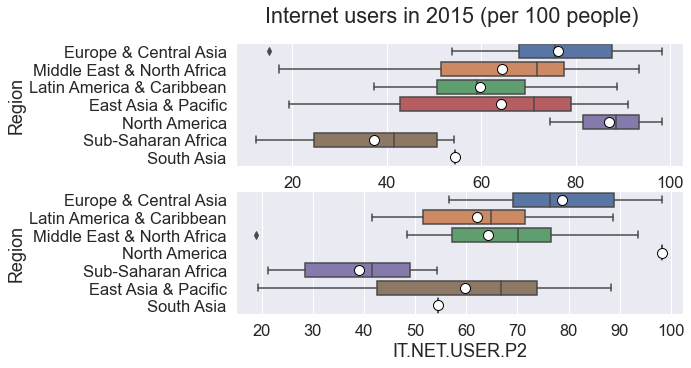

In [74]:
from pylab import rcParams

sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 8,5
plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="IT.NET.USER.P2", data=final_df,showmeans=True,
                meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="IT.NET.USER.P2", data=data_clean,showmeans=True,
                meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})
plt.suptitle("Internet users in 2015 (per 100 people)")

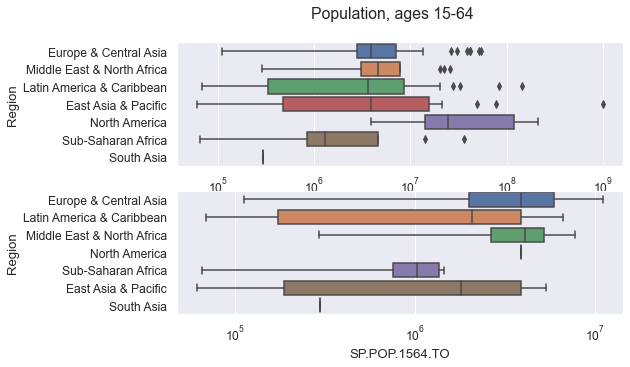

In [75]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="SP.POP.1564.TO", data=final_df)
plt.xscale('log')
plt.suptitle("Population, ages 15-64")

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="SP.POP.1564.TO", data=data_clean)
plt.xscale('log')

Text(0.5, 0.98, '% population age 15+ with tertiary schooling')

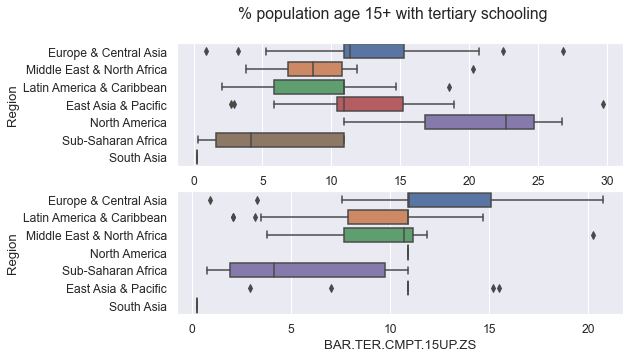

In [76]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="BAR.TER.CMPT.15UP.ZS", data=final_df)

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="BAR.TER.CMPT.15UP.ZS", data=data_clean)
plt.suptitle("% population age 15+ with tertiary schooling")

Text(0.5, 0.98, 'GNI per capita based on purchasing power parity')

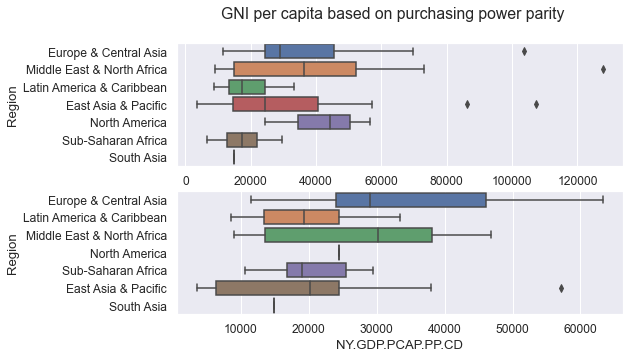

In [77]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="NY.GDP.PCAP.PP.CD", data=final_df)

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="NY.GDP.PCAP.PP.CD", data=data_clean)
plt.suptitle("GNI per capita based on purchasing power parity")

Text(0.5, 0.98, 'Enrolment in tertiary education')

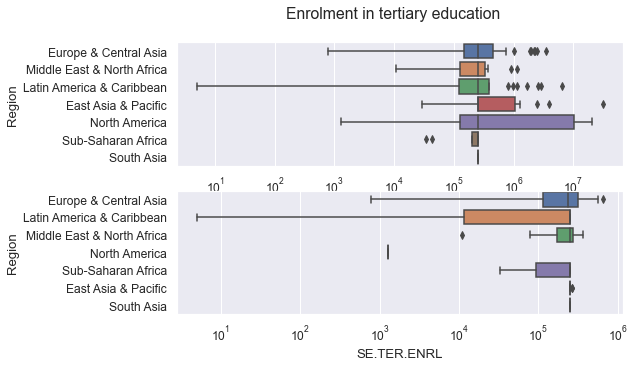

In [78]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="SE.TER.ENRL", data=final_df)
plt.xscale('log')
plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="SE.TER.ENRL", data=data_clean)
plt.xscale('log')
plt.suptitle("Enrolment in tertiary education")

Text(0.5, 0.98, 'School age population, tertiary education')

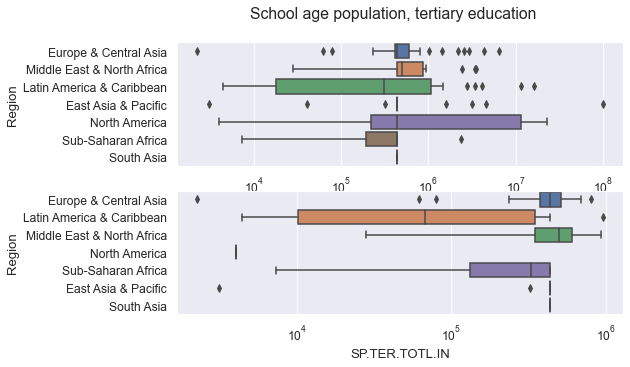

In [79]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.xscale('log')
ax = sns.boxplot(y="Region", x="SP.TER.TOTL.IN", data=final_df)

plt.subplot(2,1,2)
plt.xscale('log')
ax = sns.boxplot(y="Region", x="SP.TER.TOTL.IN", data=data_clean)
plt.suptitle("School age population, tertiary education")

Text(0.5, 1.0, 'School age population, tertiary education')

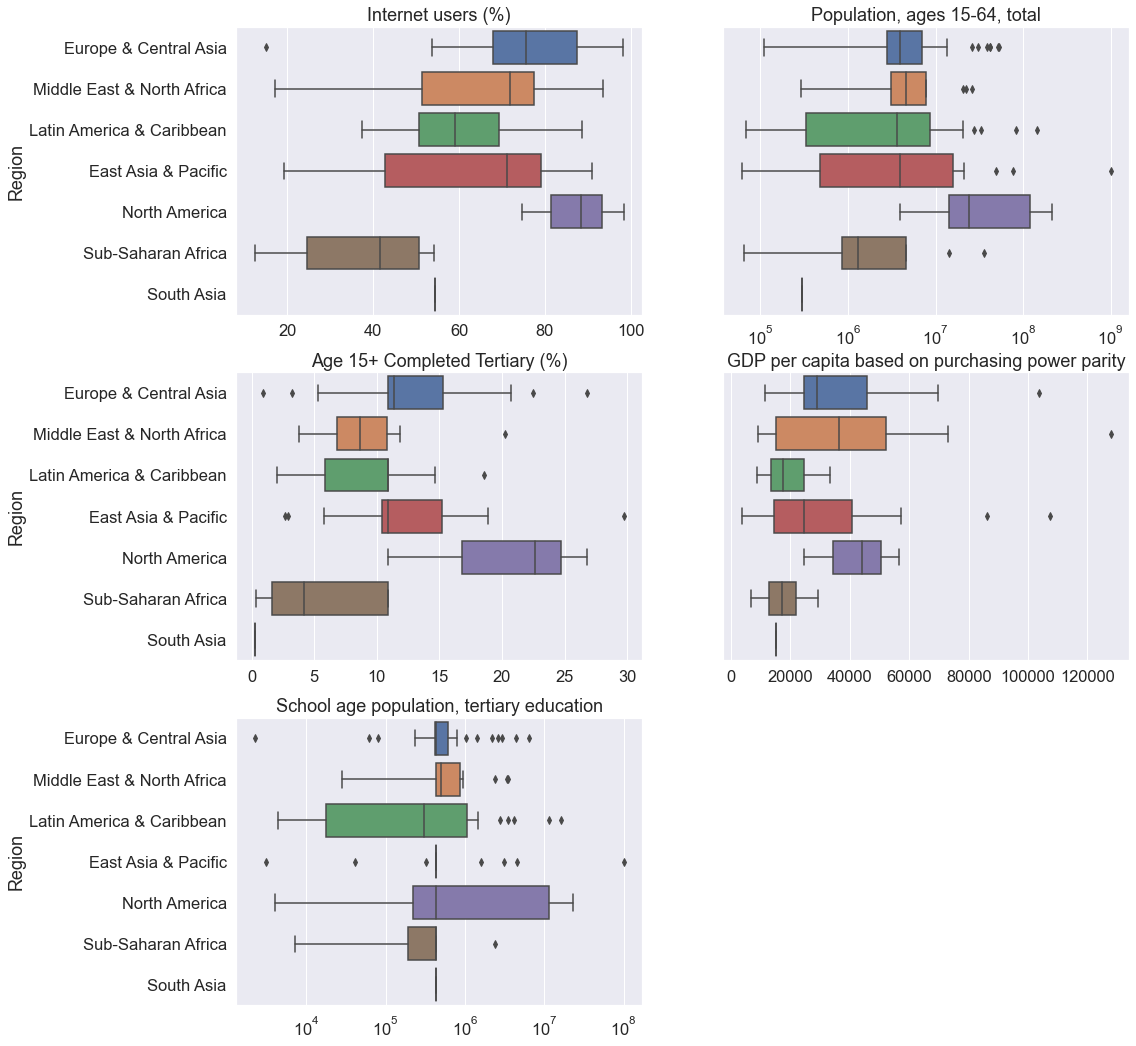

In [80]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.boxplot(data=final_df, x="IT.NET.USER.P2", y="Region")
plt.xlabel("")
plt.title("Internet users (%)")

plt.subplot(3,2,2)
sns.boxplot(data=final_df, x="SP.POP.1564.TO", y="Region")
plt.xscale('log')
plt.xlabel("")
plt.title("Population, ages 15-64, total")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(3,2,3)
sns.boxplot(data=final_df, x="BAR.TER.CMPT.15UP.ZS", y="Region")
plt.xlabel("")
plt.title("Age 15+ Completed Tertiary (%)")

plt.subplot(3,2,4)
sns.boxplot(data=final_df, x="NY.GDP.PCAP.PP.CD", y="Region")
plt.xlabel("")
plt.title("GDP per capita based on purchasing power parity")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(3,2,5)
sns.boxplot(data=final_df, x="SP.TER.TOTL.IN", y="Region")
plt.xscale('log')
plt.xlabel("")
plt.title("School age population, tertiary education")

### Corrolation between selected indicatores

In [81]:
num_var = final_df.dtypes[final_df.dtypes.values != 'object'].index


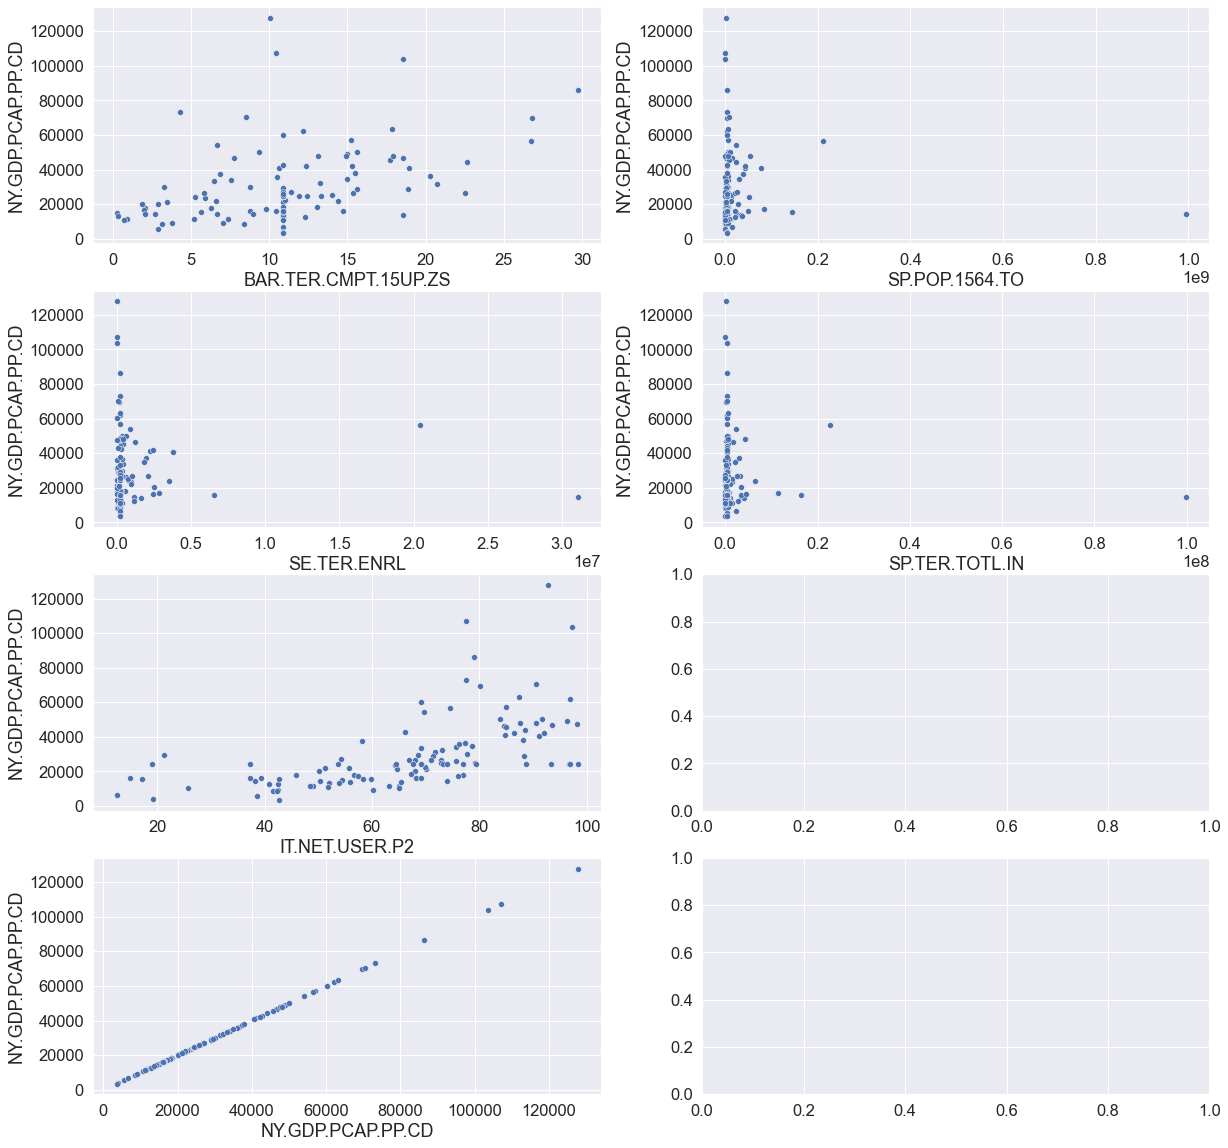

In [82]:
f, axes = plt.subplots(4,2 , figsize=(20, 20), sharex=False)
for i, feature in enumerate(num_var):
    sns.scatterplot(data=final_df, x = feature, y= "NY.GDP.PCAP.PP.CD",ax=axes[i%4, i//4])

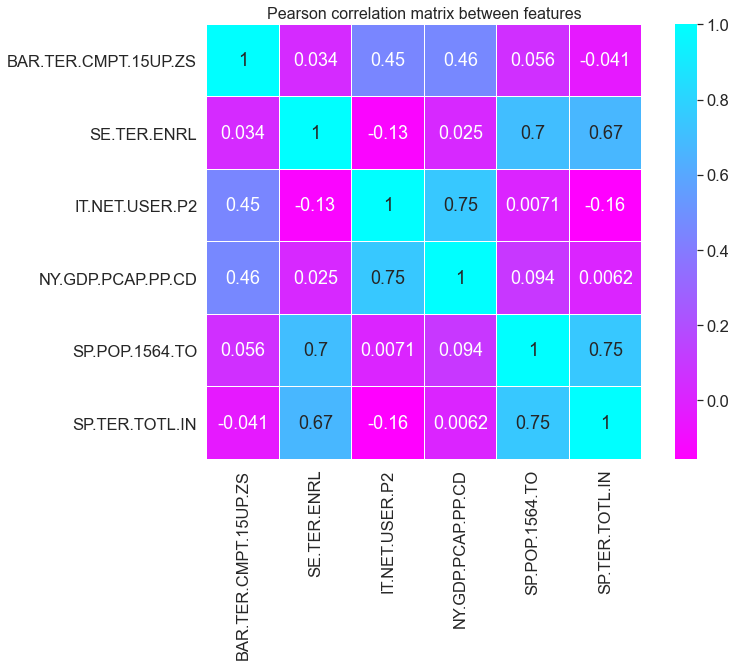

In [83]:
#mask = np.zeros_like(pivot_plus_country.corr(method = 'spearman'))
#mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
plt.title('Pearson correlation matrix between features', y=1, size=16)

sns.heatmap(final_df.corr(method = 'spearman'), linewidths=0.1, vmax=1.0,
            square=True, cmap="cool_r", linecolor='white', annot=True)
plt.show()

__Just keeping 3 indicatores with the hightest corrolation__



- Internet users 
- GDP per capita
- Age 15+ Completed Tertiary

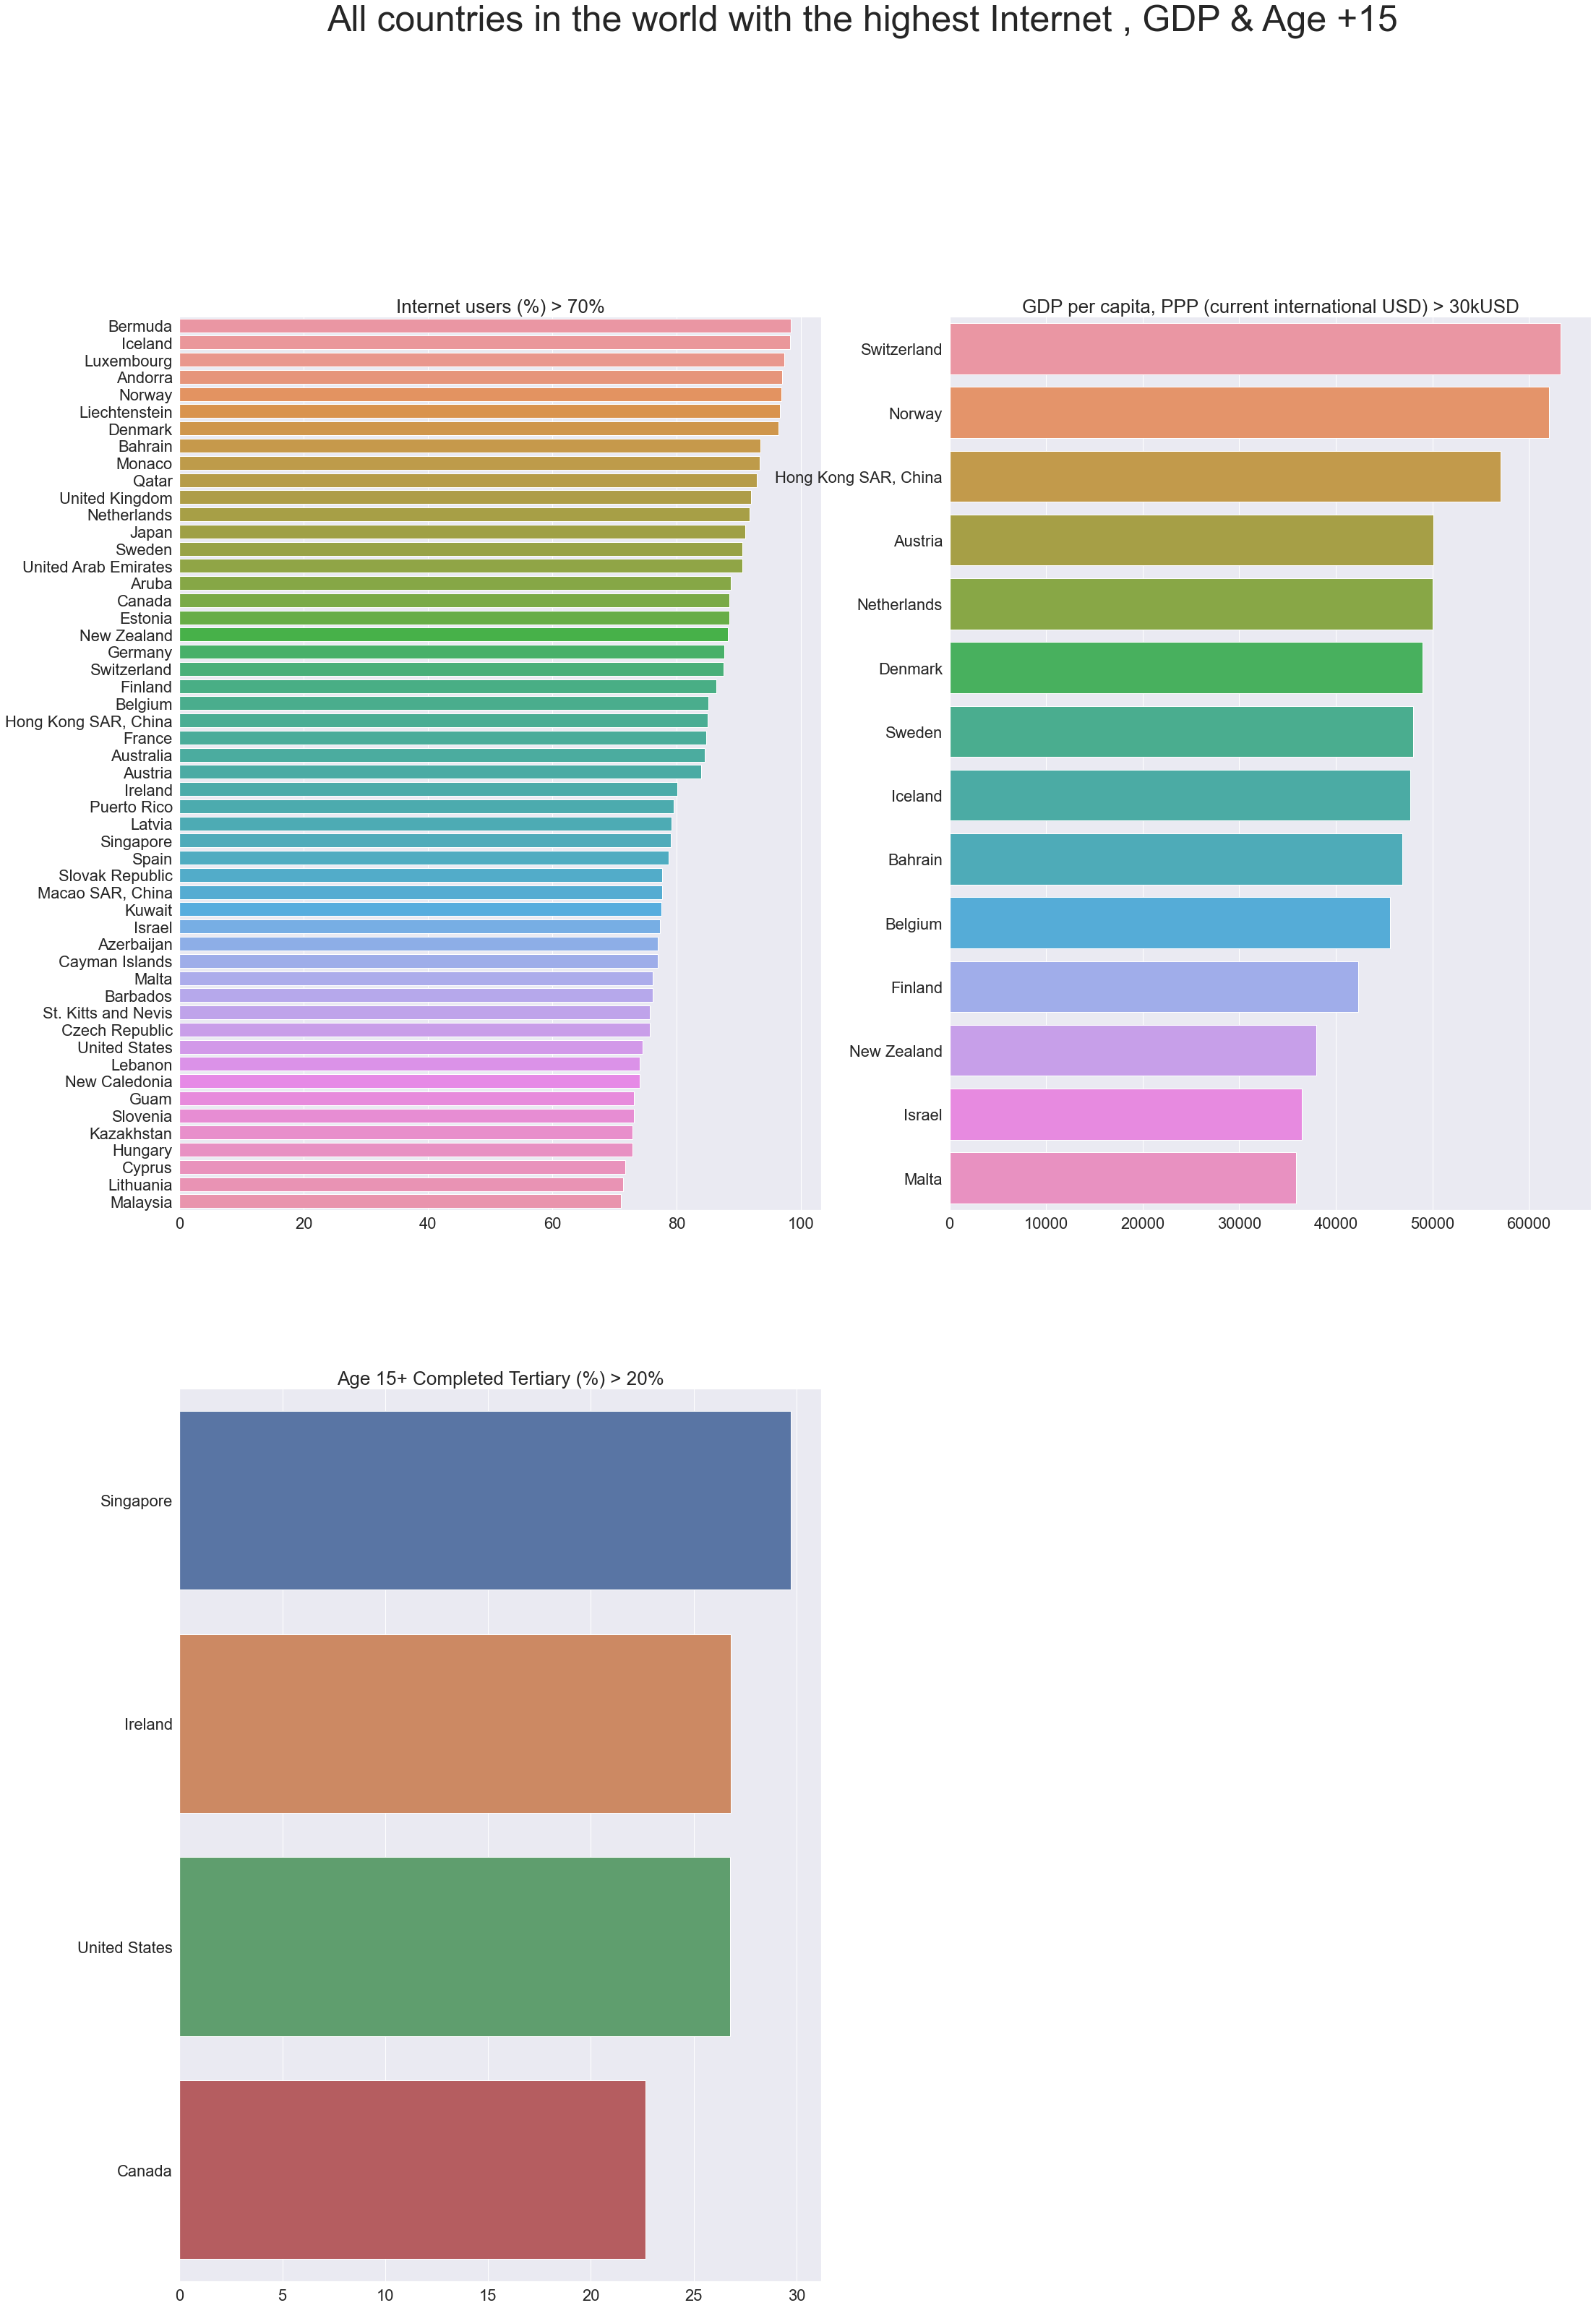

In [113]:
data_sort = final_df.sort_values(by=['IT.NET.USER.P2'], ascending=False)
pivot_world_INT = data_sort[(data_sort['IT.NET.USER.P2'] > 70)]

pivot_world_GDP = pivot_world_INT.sort_values(by=['NY.GDP.PCAP.PP.CD'], ascending=False)
pivot_world_GDP = pivot_world_GDP[(pivot_world_GDP['NY.GDP.PCAP.PP.CD'] > 40000)]

pivot_world_EDU = pivot_world_GDP.sort_values(by=['BAR.TER.CMPT.15UP.ZS'], ascending=False)
pivot_world_EDU = pivot_world_EDU[(pivot_world_EDU['BAR.TER.CMPT.15UP.ZS'] > 20)]

sns.set(font_scale=2.0)
plt.figure(figsize=(35,50))
plt.suptitle('All countries in the world with the highest Internet , GDP & Age +15', size=50, y=1)

plt.subplot(2,2,1)
sns.barplot(data=pivot_world_INT, y="Name", x="IT.NET.USER.P2")
plt.xlabel('')
plt.ylabel('')
plt.title("Internet users (%) > 70%", fontsize=26)

plt.subplot(2,2,2)
sns.barplot(data=pivot_world_GNI, y="Name", x="NY.GDP.PCAP.PP.CD")
plt.xlabel('')
plt.ylabel('')
plt.title("GDP per capita, PPP (current international USD) > 30kUSD", fontsize=26)

plt.subplot(2,2,3)
sns.barplot(data=pivot_world_EDU, y="Name", x="BAR.TER.CMPT.15UP.ZS")
plt.xlabel('')
plt.ylabel('')
plt.title("Age 15+ Completed Tertiary (%) > 20%", fontsize=26)
plt.show()

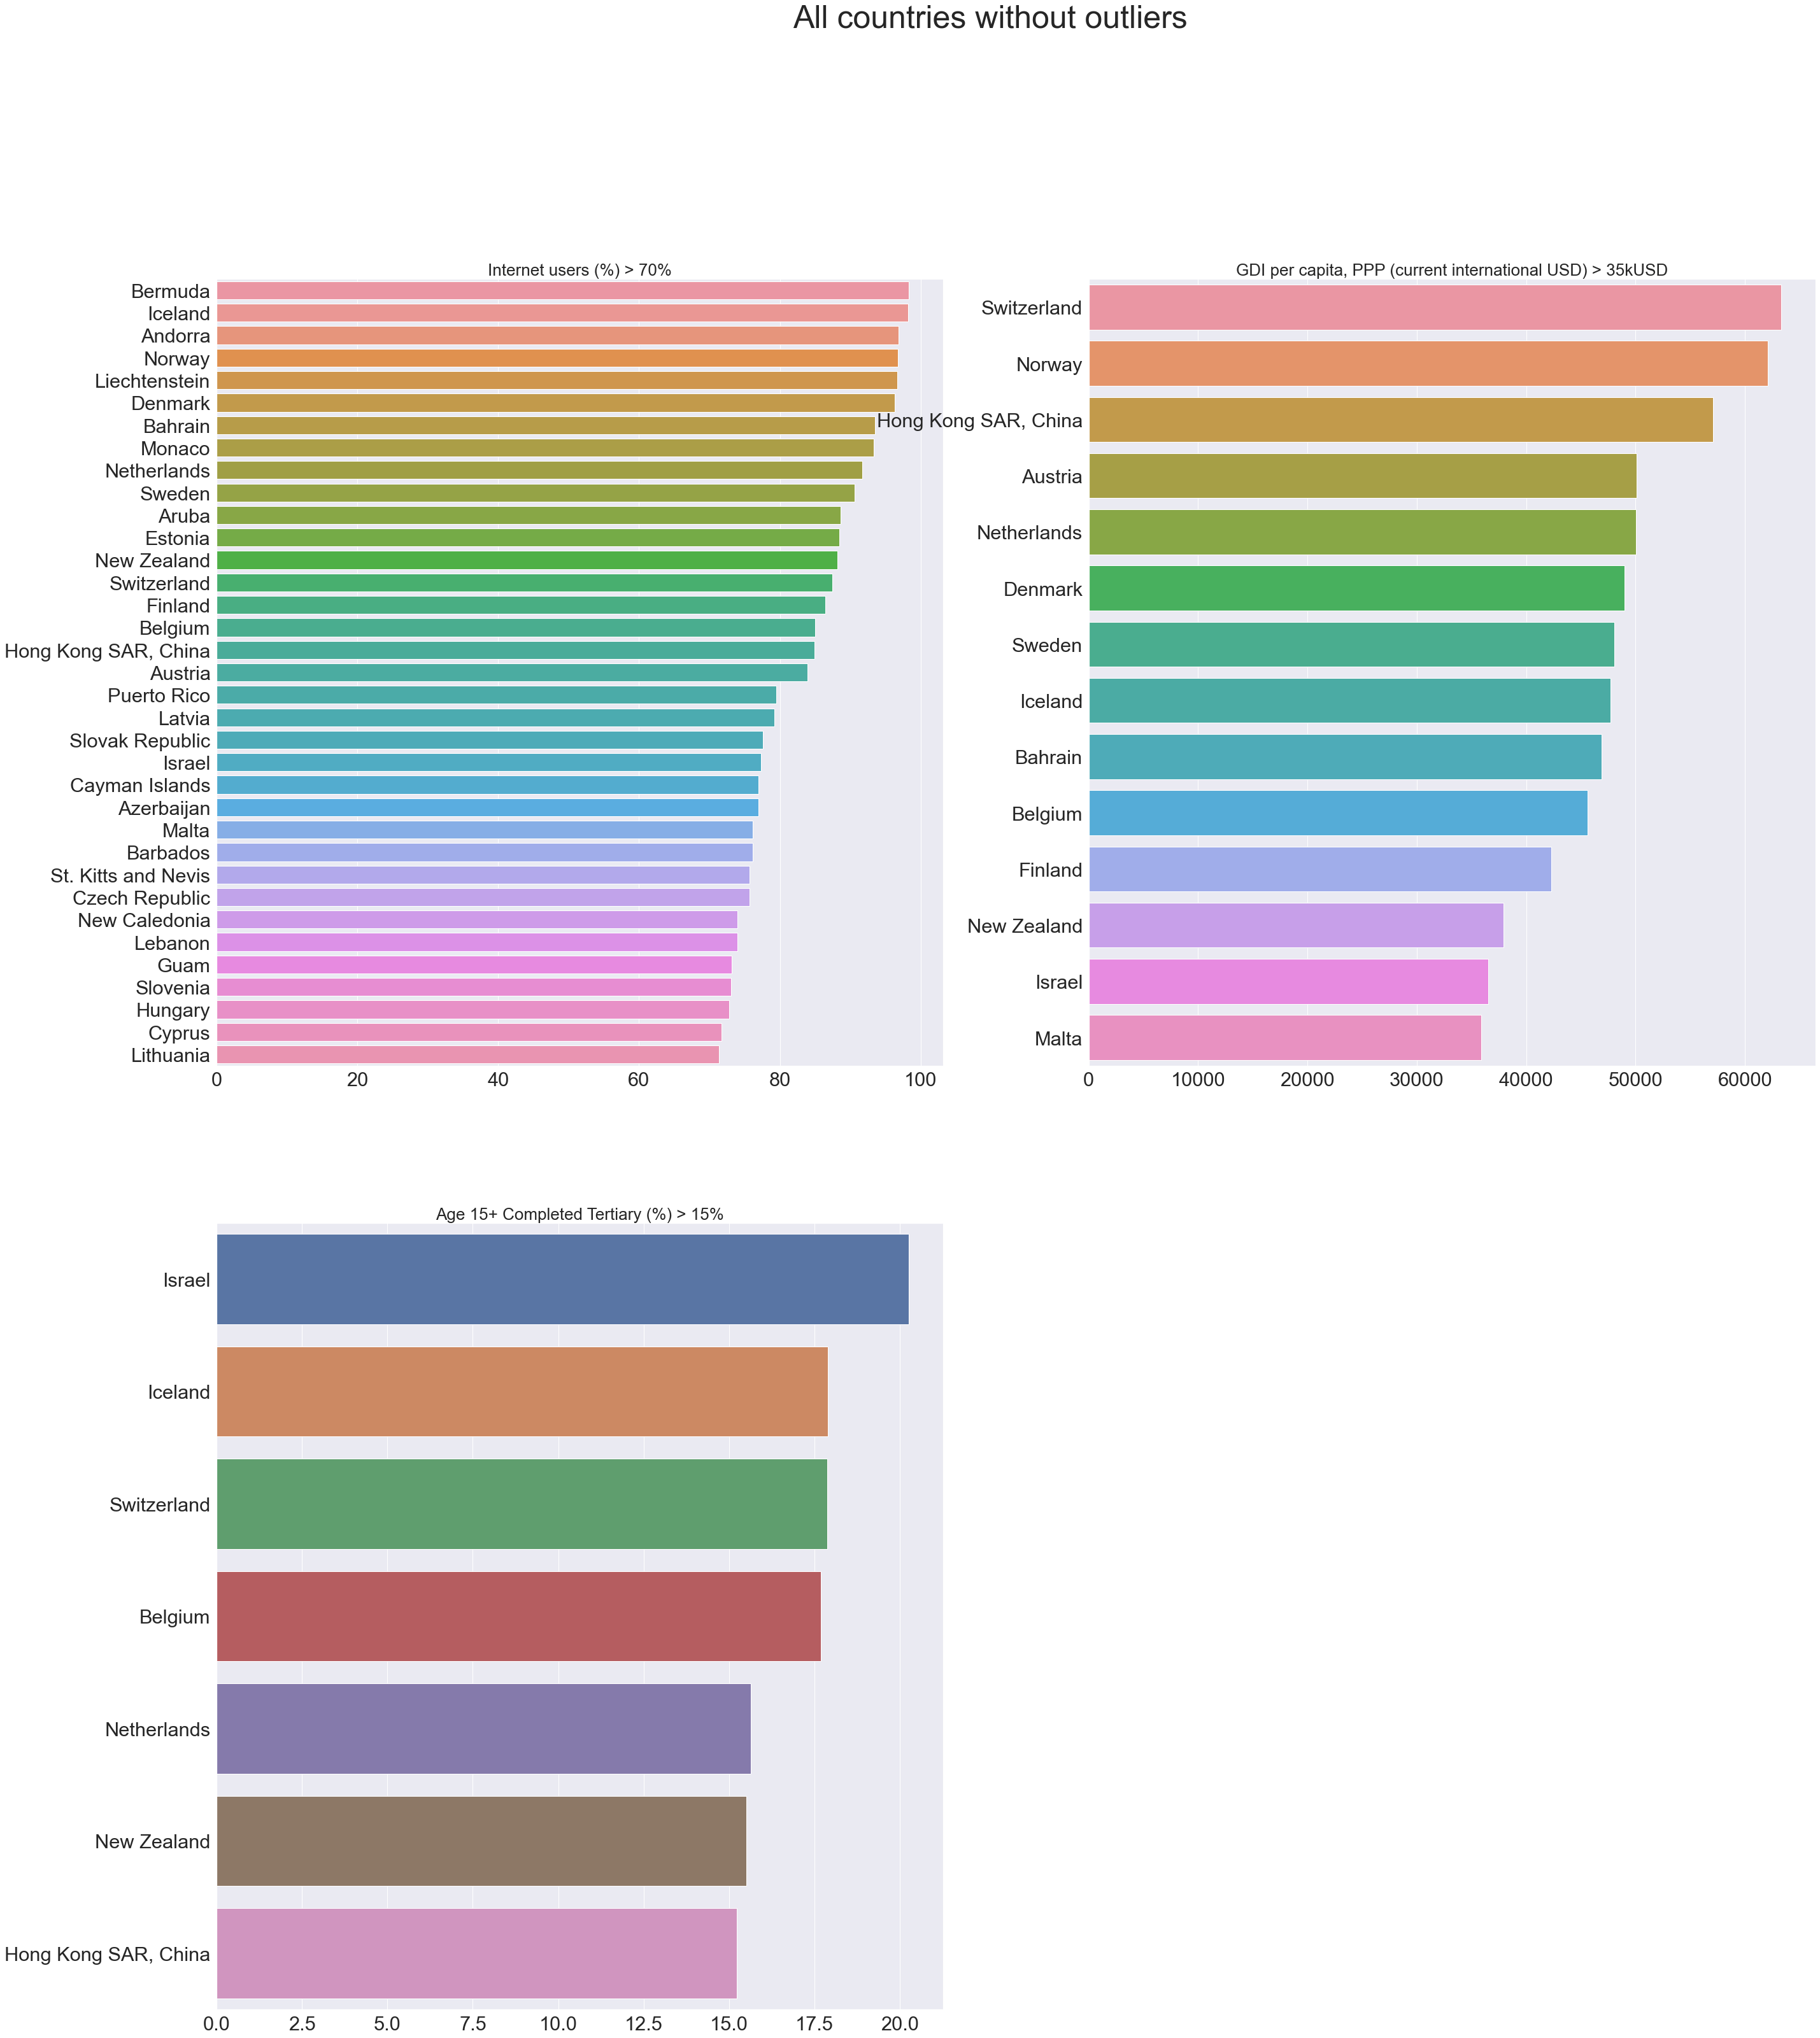

In [89]:


data_sort = data_clean.sort_values(by=['IT.NET.USER.P2'], ascending=False)
pivot_world_INT = data_sort[(data_sort['IT.NET.USER.P2'] > 70)]

pivot_world_GDP = pivot_world_INT.sort_values(by=['NY.GDP.PCAP.PP.CD'], ascending=False)
pivot_world_GDP = pivot_world_GDP[(pivot_world_GDP['NY.GDP.PCAP.PP.CD'] > 35000)]

pivot_world_EDU = pivot_world_GDP.sort_values(by=['BAR.TER.CMPT.15UP.ZS'], ascending=False)
pivot_world_EDU = pivot_world_EDU[(pivot_world_EDU['BAR.TER.CMPT.15UP.ZS'] > 15)]

sns.set(font_scale=2.8)
plt.figure(figsize=(45,50))
plt.suptitle('All countries without outliers', size=50, y=1)

plt.subplot(2,2,1)
sns.barplot(data=pivot_world_INT, y="Name", x="IT.NET.USER.P2")
plt.xlabel('')
plt.ylabel('')
plt.title("Internet users (%) > 70%", fontsize=26)

plt.subplot(2,2,2)
sns.barplot(data=pivot_world_GNI, y="Name", x="NY.GDP.PCAP.PP.CD")
plt.xlabel('')
plt.ylabel('')
plt.title("GDI per capita, PPP (current international USD) > 35kUSD", fontsize=26)

plt.subplot(2,2,3)
sns.barplot(data=pivot_world_EDU, y="Name", x="BAR.TER.CMPT.15UP.ZS")
plt.xlabel('')
plt.ylabel('')
plt.title("Age 15+ Completed Tertiary (%) > 15%", fontsize=26)
plt.show()

### PROJECTIONS

In [90]:
data_projection.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2025,2030,2035,2040,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

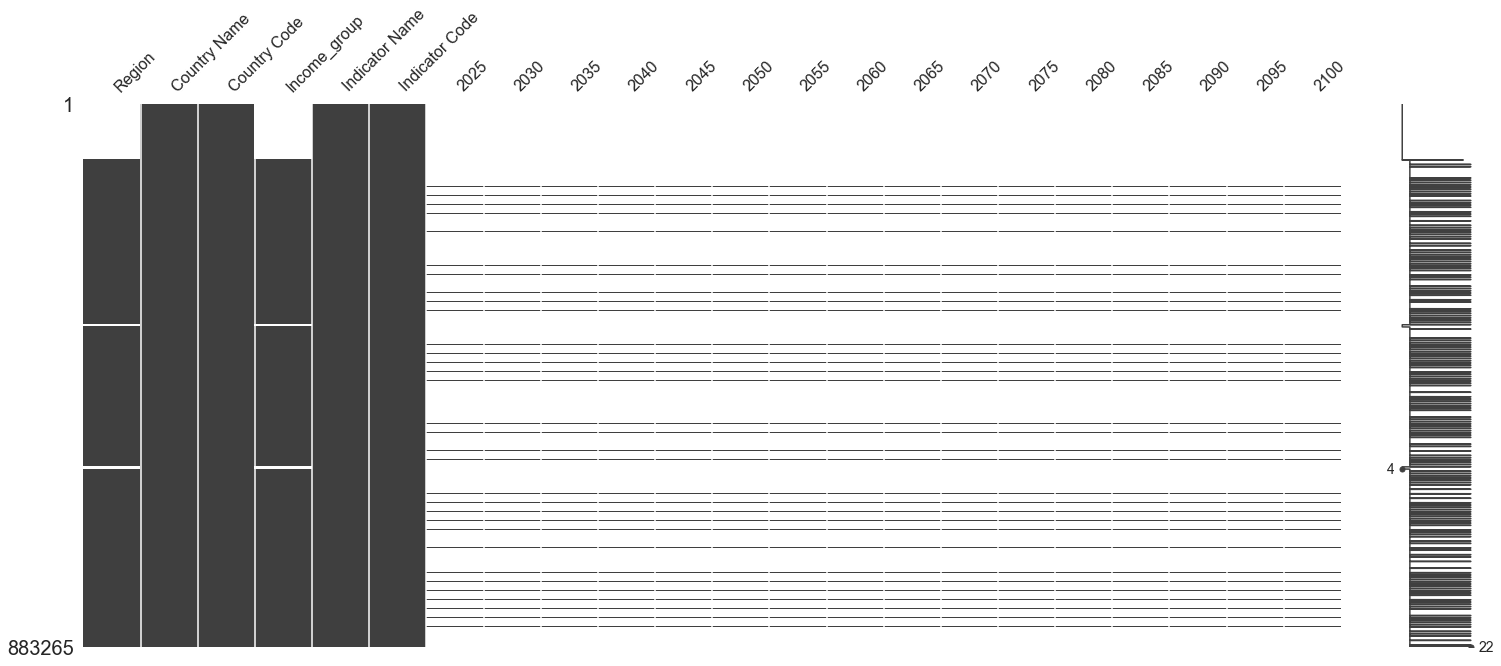

In [91]:
msno.matrix(data_projection)

In [92]:
data_projection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883265 entries, 0 to 883264
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          784310 non-null  object 
 1   Country Name    883265 non-null  object 
 2   Country Code    883265 non-null  object 
 3   Income_group    784310 non-null  object 
 4   Indicator Name  883265 non-null  object 
 5   Indicator Code  883265 non-null  object 
 6   2025            51436 non-null   float64
 7   2030            51436 non-null   float64
 8   2035            51436 non-null   float64
 9   2040            51436 non-null   float64
 10  2045            51436 non-null   float64
 11  2050            51436 non-null   float64
 12  2055            51436 non-null   float64
 13  2060            51436 non-null   float64
 14  2065            51436 non-null   float64
 15  2070            51436 non-null   float64
 16  2075            51436 non-null   float64
 17  2080      

__Not enough data so making sample__

In [93]:
data_projections1 = data_projection[data_projection['2025'].notnull()]
data_projections1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51436 entries, 91309 to 883256
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          51128 non-null  object 
 1   Country Name    51436 non-null  object 
 2   Country Code    51436 non-null  object 
 3   Income_group    51128 non-null  object 
 4   Indicator Name  51436 non-null  object 
 5   Indicator Code  51436 non-null  object 
 6   2025            51436 non-null  float64
 7   2030            51436 non-null  float64
 8   2035            51436 non-null  float64
 9   2040            51436 non-null  float64
 10  2045            51436 non-null  float64
 11  2050            51436 non-null  float64
 12  2055            51436 non-null  float64
 13  2060            51436 non-null  float64
 14  2065            51436 non-null  float64
 15  2070            51436 non-null  float64
 16  2075            51436 non-null  float64
 17  2080            51436 non-

In [95]:
data_projections1['Country Name'].describe()

count       51436
unique        167
top       Belarus
freq          308
Name: Country Name, dtype: object

In [96]:
data_projections1 = data_projections1.dropna(axis=1)
data_projections1.shape

(51436, 20)

In [552]:
data_projections1['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

__CONCLUSIONS:__ there's projection data only for Wittegenstein Projection indicators on education.

In [100]:
pivot_world_EDU['Name'].unique()

array(['Singapore', 'Ireland', 'United States', 'Canada', 'Japan',
       'Luxembourg', 'Australia', 'Iceland', 'Switzerland', 'Belgium',
       'Netherlands', 'United Kingdom', 'Hong Kong SAR, China'],
      dtype=object)

In [101]:
data_r_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 96665 to 866315
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          130 non-null    object 
 1   Country Name    130 non-null    object 
 2   Country Code    130 non-null    object 
 3   Income_group    130 non-null    object 
 4   Indicator Name  130 non-null    object 
 5   Indicator Code  130 non-null    object 
 6   2000            117 non-null    float64
 7   2001            115 non-null    float64
 8   2002            117 non-null    float64
 9   2003            114 non-null    float64
 10  2004            117 non-null    float64
 11  2005            119 non-null    float64
 12  2006            120 non-null    float64
 13  2007            121 non-null    float64
 14  2008            121 non-null    float64
 15  2009            120 non-null    float64
 16  2010            120 non-null    float64
 17  2011            121 non-null

Evolution in all countries

In [114]:
Countries_to_keep = ['Singapore', 'Ireland', 'United States', 'Canada']

data_p_internet = data_r_internet[data_r_internet['Country Name'].isin(Countries_to_keep)]
data_p_internet = data_p_internet.drop(['Country Code', 'Indicator Code', 'Indicator Name', 
                                        'Region', 'Income_group'], axis=1)
data_p_internet = data_p_internet.rename(columns={'Country Name':'Country'})
data_p_internet.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
217610,Canada,51.300000,60.200000,61.593299,64.200000,65.955963,71.660000,72.400000,73.200000,76.70,80.30,80.30,83.000000,83.000000,85.800000,87.120000,88.470000
426515,Ireland,17.850467,23.138812,25.850000,34.310000,36.990000,41.610000,54.820000,61.158325,65.34,67.38,69.85,74.889973,76.919993,78.247700,79.690000,80.122400
712385,Singapore,36.000000,41.670425,47.000000,53.837943,62.000000,61.000000,59.000000,69.900000,69.00,69.00,71.00,71.000000,72.000000,80.902057,79.029236,79.012957
844325,United States,43.079163,49.080832,58.785404,61.697117,64.758256,67.968053,68.931193,75.000000,74.00,71.00,71.69,69.729461,74.700000,71.400000,73.000000,74.554202


In [115]:
data_p_internet = data_p_internet.set_index('Country')
data_p_internet

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Canada,51.300000,60.200000,61.593299,64.200000,65.955963,71.660000,72.400000,73.200000,76.70,80.30,80.30,83.000000,83.000000,85.800000,87.120000,88.470000
Ireland,17.850467,23.138812,25.850000,34.310000,36.990000,41.610000,54.820000,61.158325,65.34,67.38,69.85,74.889973,76.919993,78.247700,79.690000,80.122400
Singapore,36.000000,41.670425,47.000000,53.837943,62.000000,61.000000,59.000000,69.900000,69.00,69.00,71.00,71.000000,72.000000,80.902057,79.029236,79.012957
United States,43.079163,49.080832,58.785404,61.697117,64.758256,67.968053,68.931193,75.000000,74.00,71.00,71.69,69.729461,74.700000,71.400000,73.000000,74.554202


In [116]:
data_p_internet_years = data_p_internet.transpose()
data_p_internet_years = data_p_internet_years.round(2)
data_p_internet_years.head()

Country,Canada,Ireland,Singapore,United States
2000,51.30,17.85,36.00,43.08
2001,60.20,23.14,41.67,49.08
2002,61.59,25.85,47.00,58.79
2003,64.20,34.31,53.84,61.70
2004,65.96,36.99,62.00,64.76


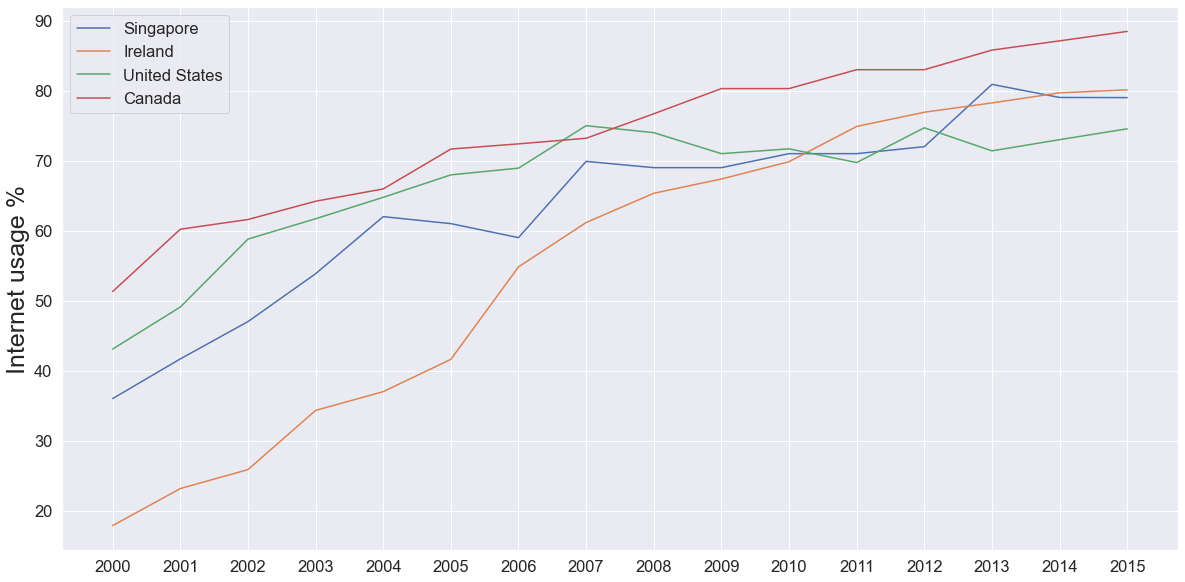

In [117]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,10))
for country in Countries_to_keep:
    sns.lineplot(data=data_p_internet_years,
                 x=data_p_internet_years.index,
                 y=country,
                 label=country)
plt.ylabel('Internet usage %', fontsize=25);